# Práctica 7
## Clustering

### **Ejercicio 2**

<Axes: xlabel='x', ylabel='y'>

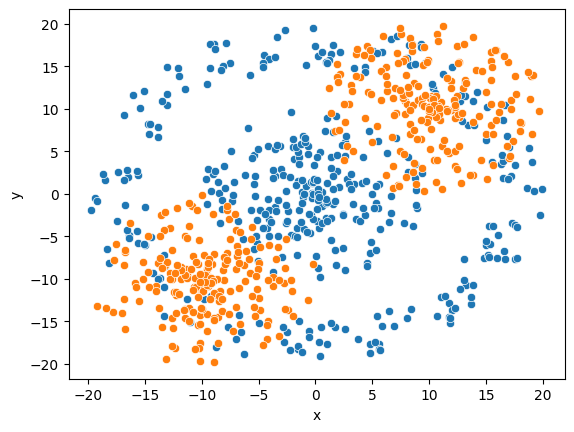

In [2]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
from sklearn.cluster import KMeans

# Ejercicio 2 a)
# Leemos ámbos archivos

df_1 = pd.read_csv('p7-data1.csv')
df_2 = pd.read_csv('p7-data2.csv')

# Generamos dos graficos de dispersión

sns.scatterplot(data=df_1, x='x', y='y')
sns.scatterplot(data=df_2, x='x', y='y')

In [3]:
# Ejercicio 2 b)
# Vemos que tanto en el primer dataframe como en el segundo, tenemos dos grupos de datos

# Ejercicio 2 c)
# Ejecutamos el comando KMeans para ambos dataframes

kmeans = KMeans(n_clusters=2)

labels_1 = kmeans.fit_predict(df_1[['x', 'y']])
labels_2 = kmeans.fit_predict(df_2[['x', 'y']])

<Axes: xlabel='x', ylabel='y'>

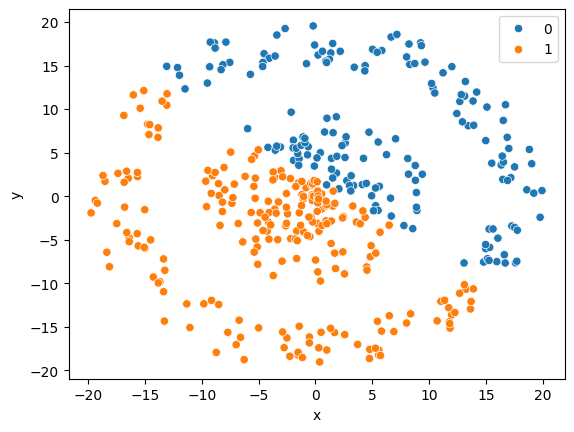

In [4]:
# Graficamos los resultados del primer dataframe

sns.scatterplot(data=df_1, x='x', y='y', hue=labels_1)

<Axes: xlabel='x', ylabel='y'>

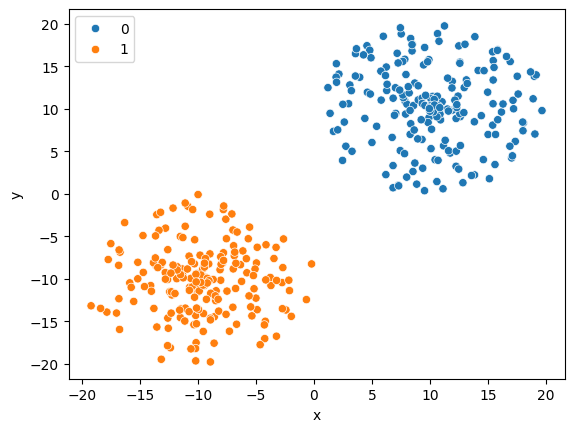

In [5]:
# Graficamos los resultados del segundo dataframe

sns.scatterplot(data=df_2, x='x', y='y', hue=labels_2)

#### **Respuesta:** Como vemos, el primer Dataframe no detecto correctamente los clusters, por la distribución. Pero, en cambio, en el segundo Dataframe, se puede observar que los clusters están bien definidos.

### **Ejercicio 3**

In [12]:
# Ejercicio 3 a)
# Cargamos el dataset de iris, teniendo en cuenta que está hecho con tabulaciones

iris = pd.read_csv('p7-iris.txt', sep='	')
iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


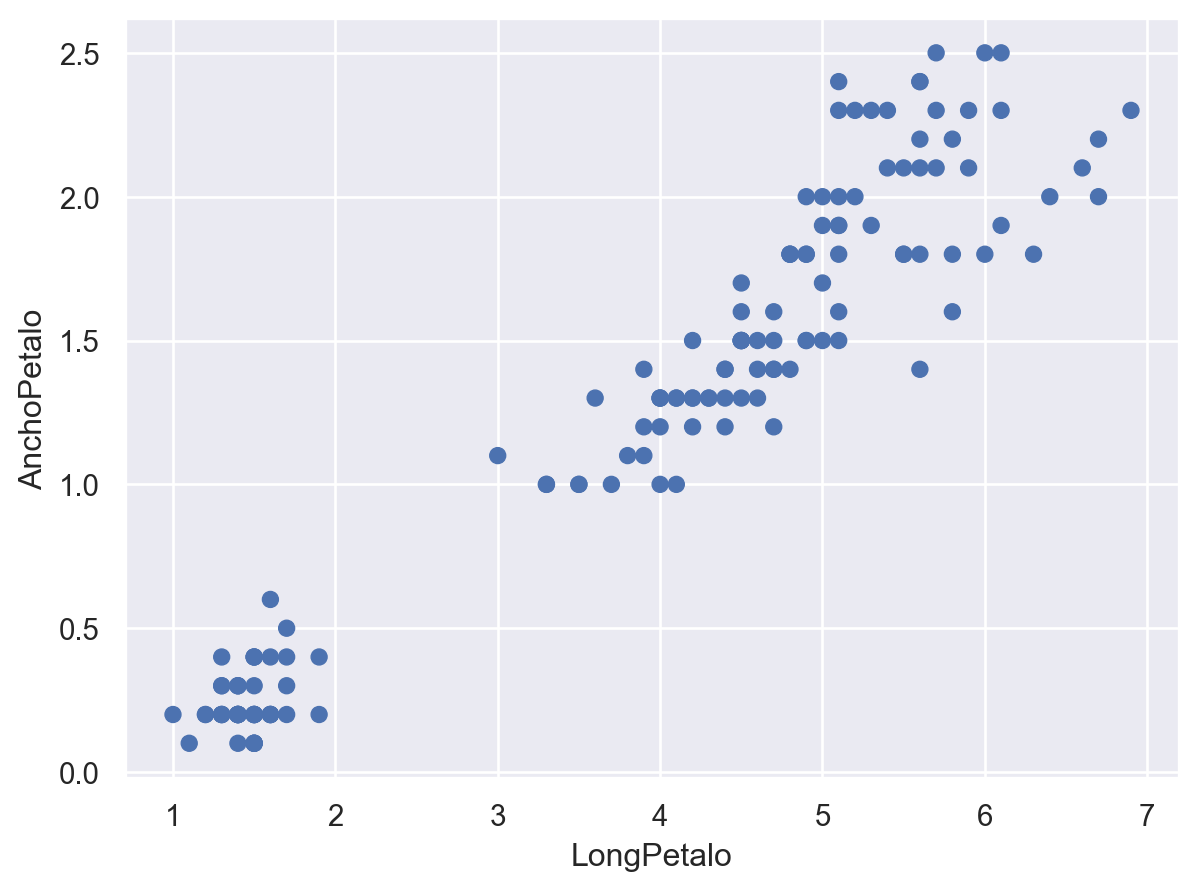

In [29]:
# Ejercicio 3 b)
# Graficamos en un diagramo de dispersion la longitud del petalo vs el ancho del petalo

(
    so.Plot(data=iris, x='LongPetalo', y='AnchoPetalo')
    .add(so.Dot())
)

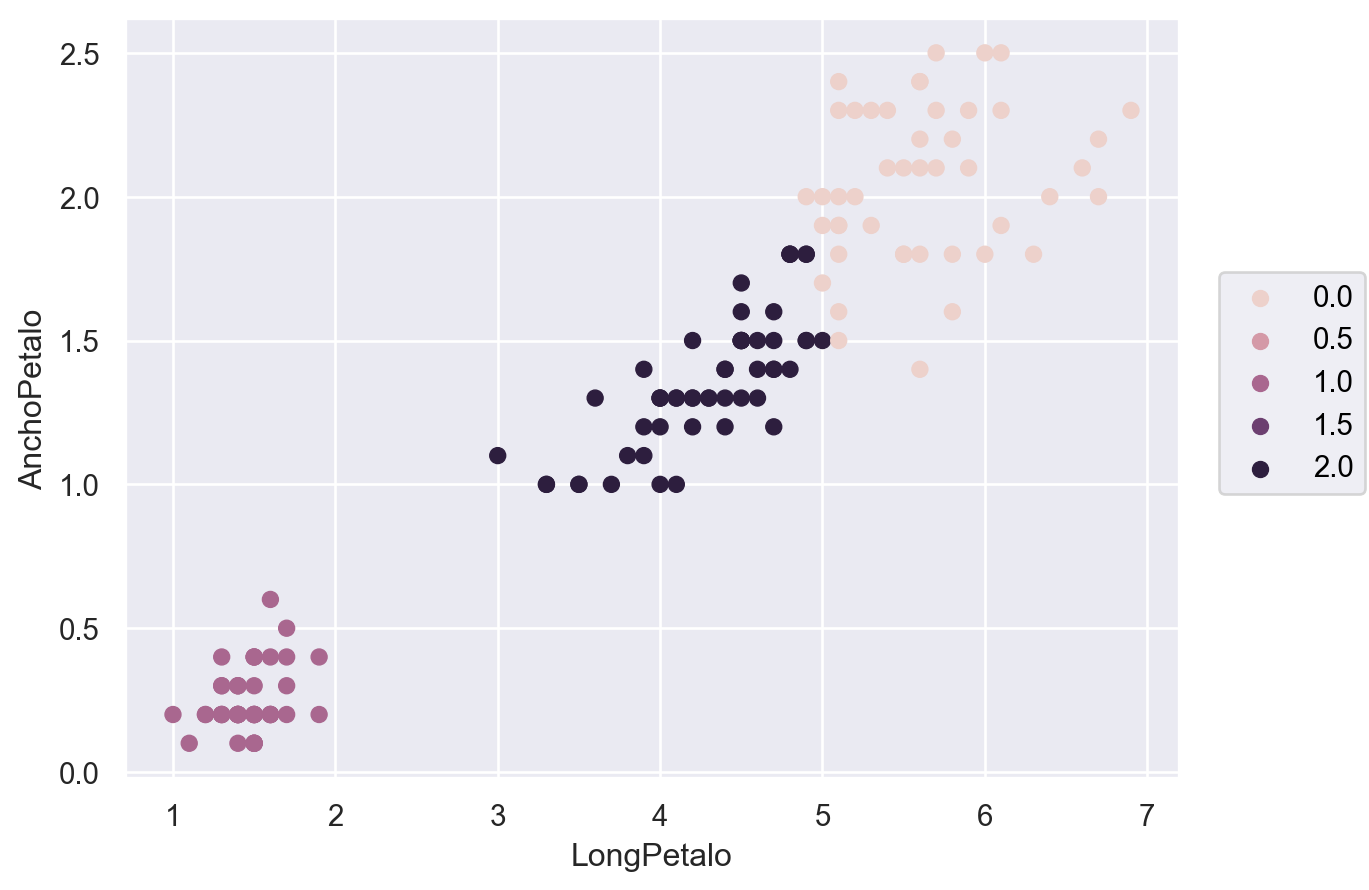

In [38]:
# Ejericio 3 c)
# Ejecutamos el comando KMeans para el dataset de iris
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(iris[['LongPetalo', 'AnchoPetalo']])

# Ejercicio 3 d)
# Graficamos los resultados
(
    so.Plot(data=iris, x='LongPetalo', y='AnchoPetalo')
    .add(so.Dot(), color=labels)
)

In [37]:
# Ejercicio 3 e)
# Evaluamos el error de clustering con el método de la inercia

kmeans.inertia_

31.387758974358977

<Axes: >

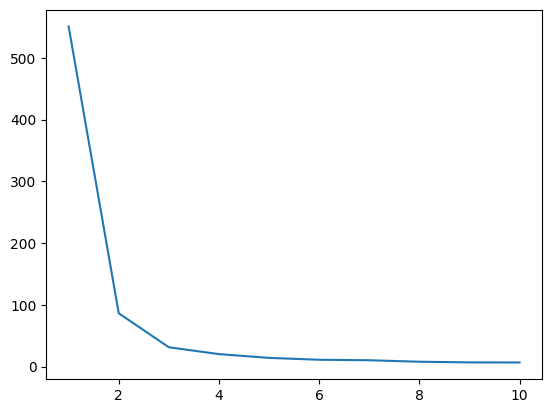

In [40]:
# Ejericio 3 f)
# Repetimos el ensayo con valores de k de 1 a 10, graficando el WCSS para cada valor de k

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris[['LongPetalo', 'AnchoPetalo']])
    wcss.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=wcss)


### **Ejercicio 4**

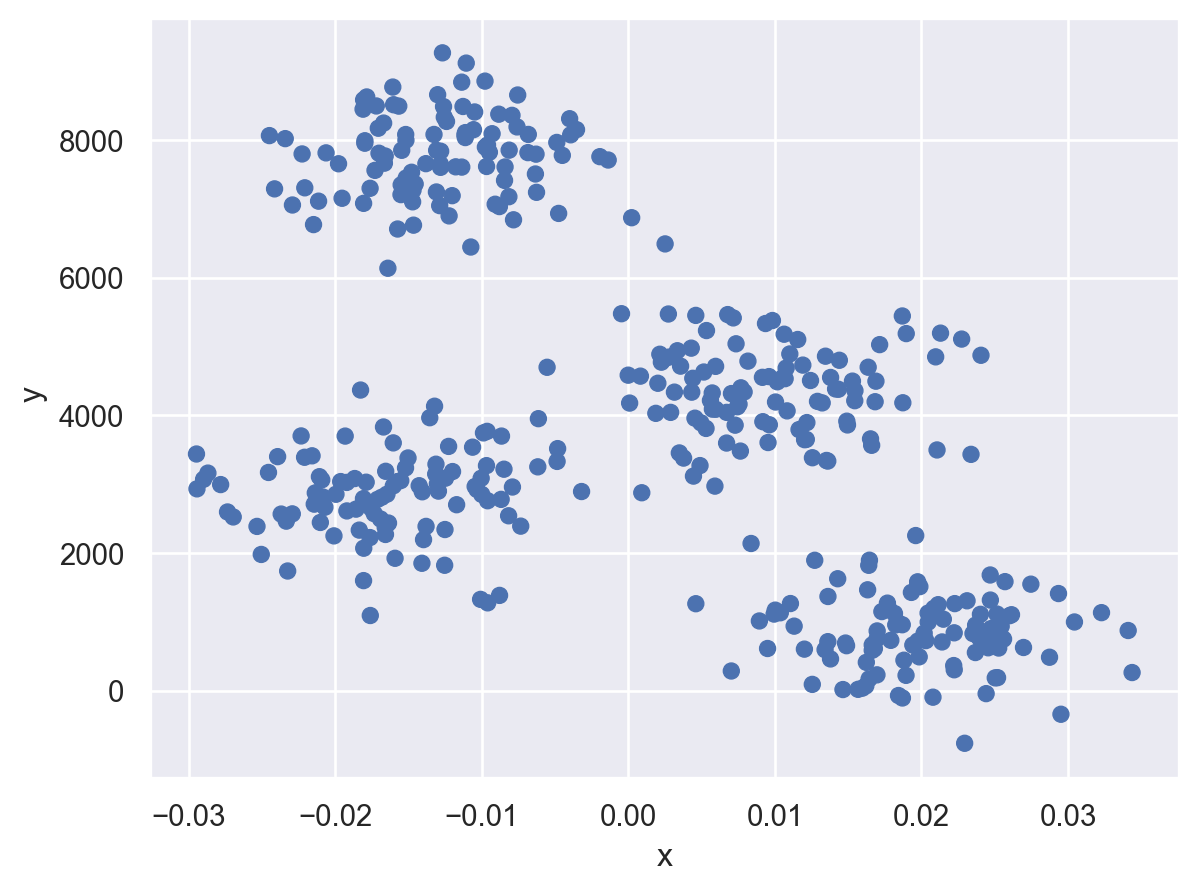

In [61]:
# Ejercicio 4 a)
# Cargamos el dataset p7-dataSinEscalar.csv y los graficamos

df = pd.read_csv('p7-dataSinEscalar.csv')

so.Plot(data=df, x='x', y=' y').add(so.Dot())

#### 4 (b) Mirando el gráfico superior 👆, podemos observar 4 clusters bien definidos.

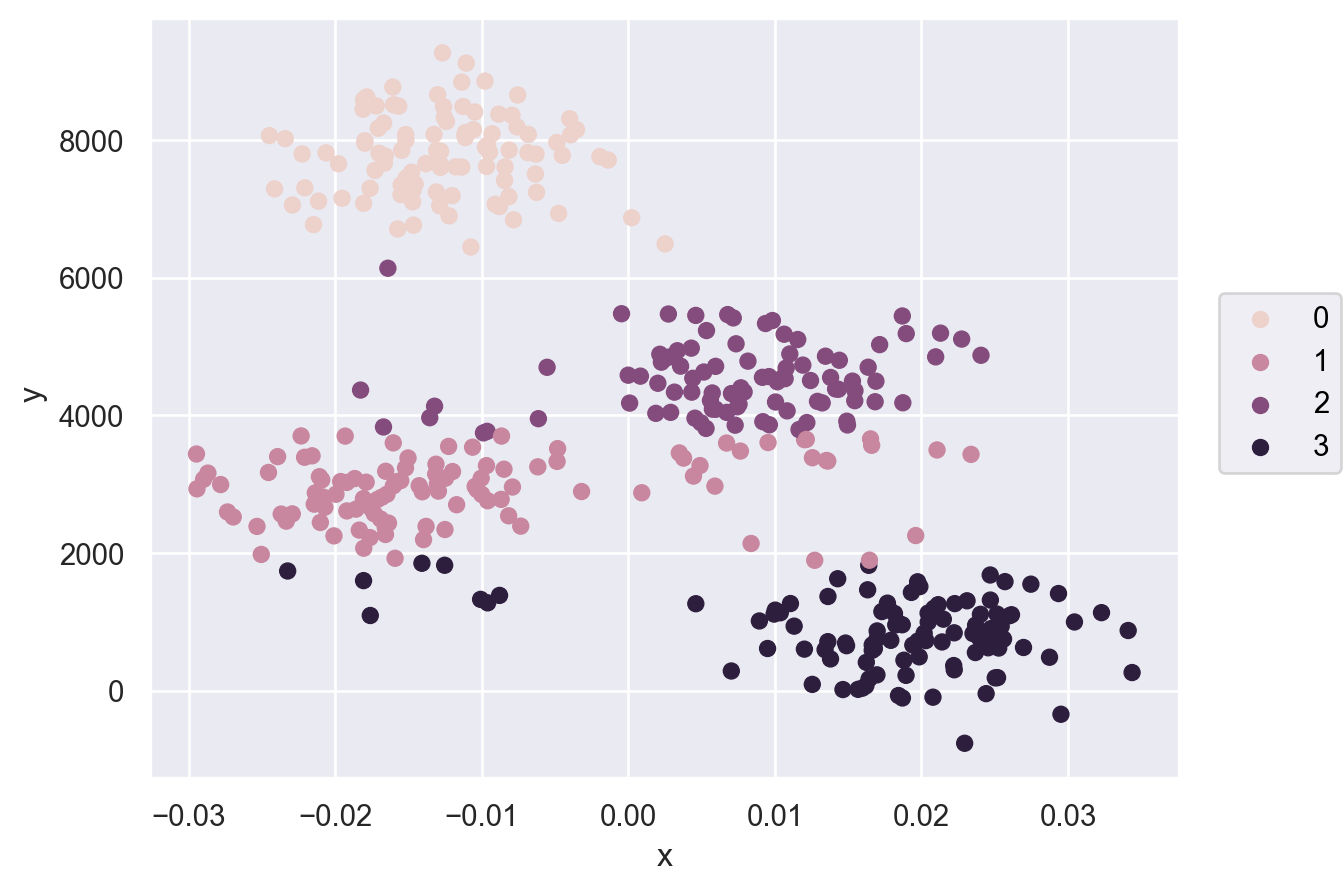

In [63]:
# Ejercicio 4 (c)
# Realizamos un kmeans con k=4

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(df[['x', ' y']])

# Graficamos
so.Plot(data=df, x='x', y=' y').add(so.Dot(), color=labels)

#### 4 (d) Podemos ver que si bien los clusters están definidos, al aplicar el algoritmo de KMeans, no se logra identificar correctamente los clusters. Esto se debe a que los datos no están escalados, y por lo tanto, el algoritmo no puede identificar correctamente los clusters.

In [64]:
# Ejercicio 4 (e)
# Reescalemos las variables para que se encuentren en el mismo rango usando el comando MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['x', ' y']] = scaler.fit_transform(df[['x', ' y']])

df.head()

,x,y
0,0.500874,0.723261
1,0.039251,0.327807
2,0.007607,0.382327
3,0.571790,0.506507
4,0.064673,0.314103


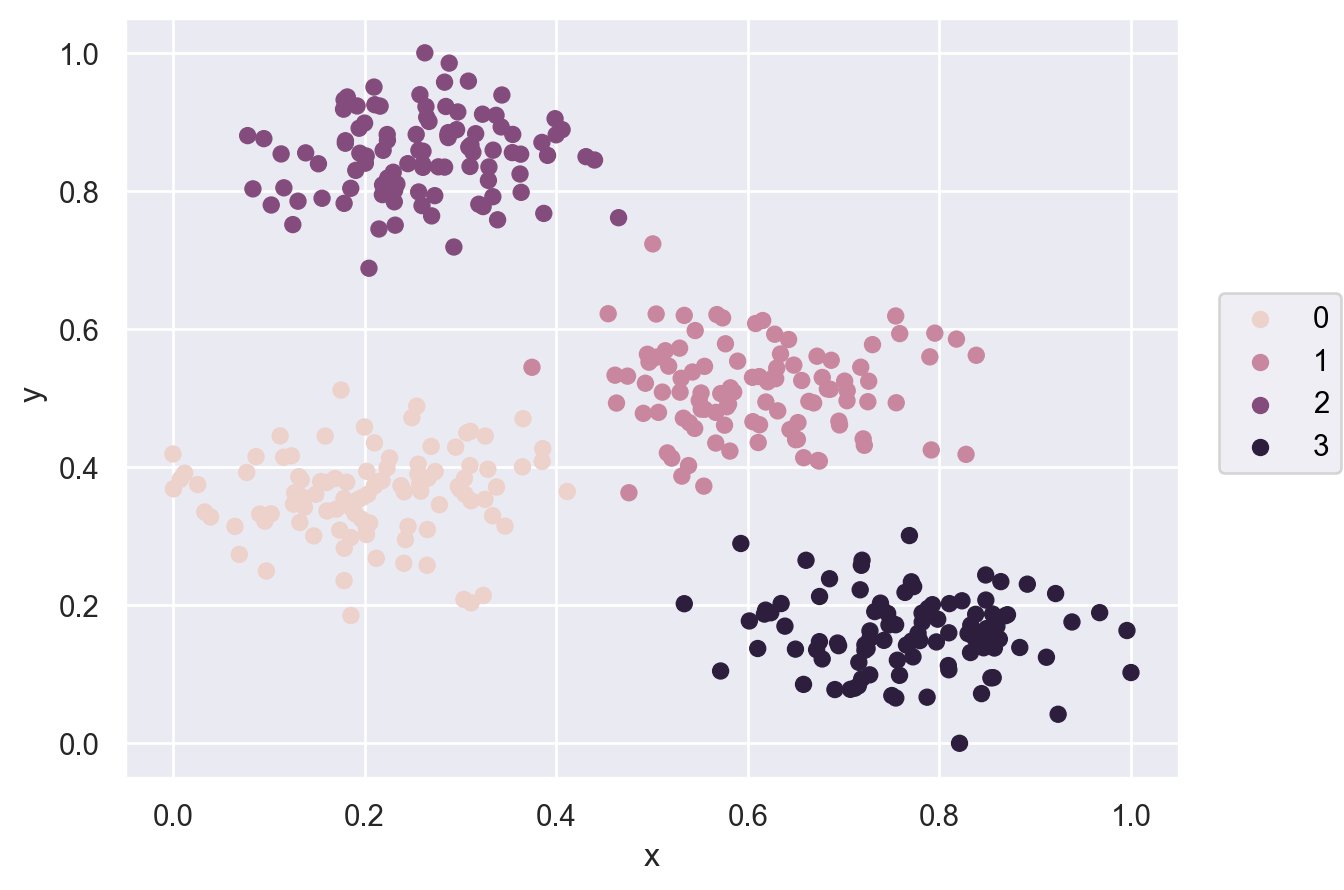

In [65]:
# Ejercicio 4 (f)
# Corremos nuevamente el procedimiento de clustering y graficamos los resultados

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(df[['x', ' y']])
so.Plot(data=df, x='x', y=' y').add(so.Dot(), color=labels)

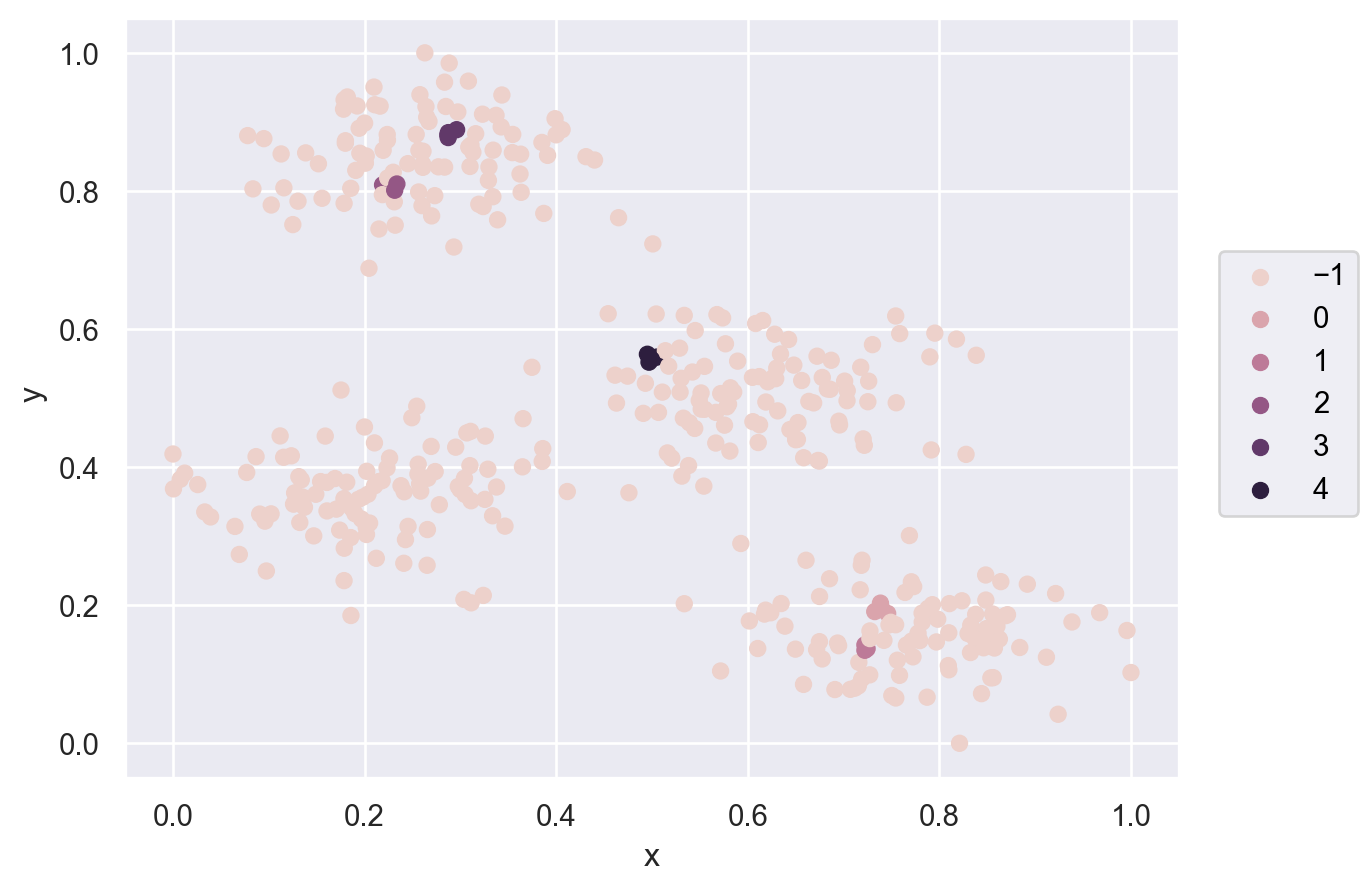

In [73]:
# Ejercicio 5
# Implementamos el algoritmo DBSCAN para analizar los datos anteriores

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=4)
labels = dbscan.fit_predict(df[['x', ' y']])
so.Plot(data=df, x='x', y=' y').add(so.Dot(), color=labels)